In [1]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import b2plot as bp

plt.style.use("belle2")

For optimal usage set `plt.style.use('belle2')`


In [25]:
import numpy as np

In [232]:
import seaborn as sns

In [274]:
import scipy.stats as stats

In [233]:
datapoints = 100000

In [234]:
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

In [ ]:
stats.crystalball(loc=0, scale=0.3,beta=0.7,m=3).rvs(datapoints)

In [404]:
def f(x,c):
    return 0.1*np.square(x) - x +c

/home/hsvidras/software/externals/v01-10-02/Linux_x86_64/common/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/hsvidras/software/externals/v01-10-02/Linux_x86_64/common/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/hsvidras/software/externals/v01-10-02/Linux_x86_64/common/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and

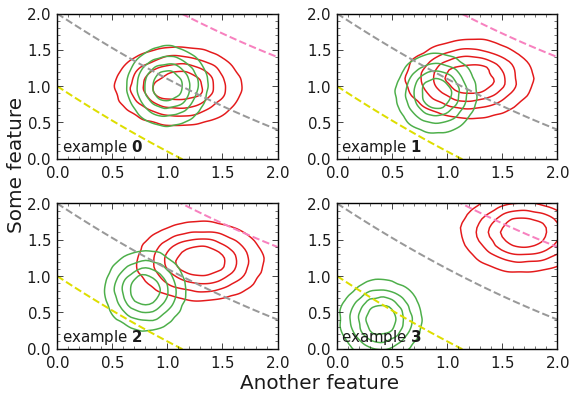

In [411]:
fig, axs = plt.subplots(2,2)

fprs = []
tprs = []

special_point_fpr1 = []
special_point_tpr1 = [] 
special_point_fpr2 = []
special_point_tpr2 = [] 
special_point_fpr3 = []
special_point_tpr3 = [] 


for n, shift in enumerate([0,0.1,0.2,0.6]):
    
    ax=axs.flatten()[n]
    
    x_no = np.random.normal(1+shift,0.3,datapoints)+np.random.normal(0.1,0.1,datapoints)
    y_no = stats.crystalball(loc=1+shift, scale=0.3,beta=3,m=3).rvs(datapoints)
    x_yes = stats.crystalball(loc=1-shift, scale=0.2,beta=2,m=6).rvs(datapoints)
    y_yes = np.random.normal(1-shift,0.3,datapoints)
    
#     ax.scatter(x_no,y_no, s=1, color = CB_color_cycle[7], alpha=1)
#     ax.scatter(x_yes,y_yes, s=1, color = CB_color_cycle[2], alpha=0.2)
    
    sns.kdeplot(x_no, y_no,fill=False, levels=5, thresh=0.2,ax=ax, color = CB_color_cycle[7])
    sns.kdeplot(x_yes, y_yes,fill=False, levels=5, thresh=0.2,ax=ax, color = CB_color_cycle[2])
 
    linex = np.linspace(0,2,100)
    ax.plot(linex, f(linex,1), lw=2, ls="dashed", color = CB_color_cycle[8])

    ax.plot(linex, f(linex,2), lw=2, ls="dashed", color = CB_color_cycle[6])

    ax.plot(linex, f(linex,3), lw=2, ls="dashed", color = CB_color_cycle[3])
    
    ax.set_ylim(0,2)
    ax.set_xlim(0,2)
    
    fpr = []
    tpr = []
    
    ax.text(0.02,0.05,f"example $\mathbf{{{n}}}$", transform=ax.transAxes)
    
    
    
    

    

    
    train_y =  np.where(y_yes<f(x_yes,1.5), 1,0)
    train_yno =  np.where(y_no<f(x_no,1.5), 1,0)
    
    special_point_fpr1.append(np.sum(np.where(train_yno==1,1,0))/datapoints)
    special_point_tpr1.append(np.sum(np.where(train_y==1,1,0))/datapoints)
    
    train_y =  np.where(y_yes<f(x_yes,2), 1,0)
    train_yno =  np.where(y_no<f(x_no,2), 1,0)
    
    special_point_fpr2.append(np.sum(np.where(train_yno==1,1,0))/datapoints)
    special_point_tpr2.append(np.sum(np.where(train_y==1,1,0))/datapoints)
    
    train_y =  np.where(y_yes<f(x_yes,2.5), 1,0)
    train_yno =  np.where(y_no<f(x_no,2.5), 1,0)
    
    special_point_fpr3.append(np.sum(np.where(train_yno==1,1,0))/datapoints)
    special_point_tpr3.append(np.sum(np.where(train_y==1,1,0))/datapoints)
    
    for i in np.linspace(-2,6,200):
        train_y =  np.where(y_yes<f(x_yes,i), 1,0)
        train_yno =  np.where(y_no<f(x_no,i), 1,0)
        #train_y = np.concatenate([train_y,train_yno])

        FPR = np.sum(np.where(train_yno==1,1,0))/datapoints
        TPR = np.sum(np.where(train_y==1,1,0))/datapoints

        fpr.append(FPR)
        tpr.append(TPR)
    
    fprs.append(fpr)
    tprs.append(tpr)

fig.text(-0.005,0.4, "Some feature", rotation=90, fontsize=20)
fig.text(0.4,-0.005, "Another feature", rotation=0, fontsize=20)
plt.tight_layout()
plt.savefig("separation_boundary.pdf", bbox_inches="tight")

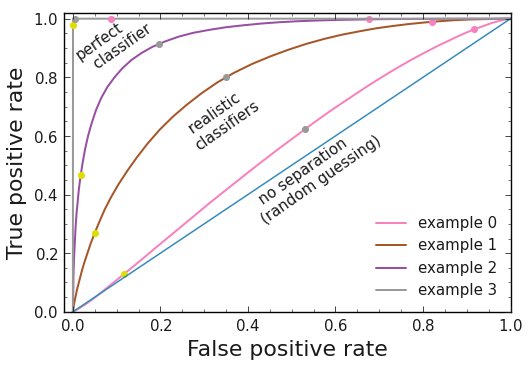

In [412]:
for i in range(0,4):
    plt.plot(fprs[i], tprs[i], lw=2,color = CB_color_cycle[3+i], label=f"example {i}")

    plt.plot(special_point_fpr1[i],special_point_tpr1[i], "o", color = CB_color_cycle[8])
    plt.plot(special_point_fpr3[i],special_point_tpr3[i], "o", color = CB_color_cycle[3])
    plt.plot(special_point_fpr2[i],special_point_tpr2[i], "o", color = CB_color_cycle[6])
    

plt.plot([0,1],[0,1])

plt.text(0.4,0.3,"  no separation\n(random guessing)", rotation=35)
plt.text(0.25,0.55," realistic\nclassifiers", rotation=35)
plt.text(0.001,0.81,"perfect\n  classifier", rotation=35)
    
plt.xlim(-0.02,1)
plt.ylim(0,1.02)

plt.legend()

plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.savefig("roc_curve.pdf", bbox_inches="tight")